<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/ML_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

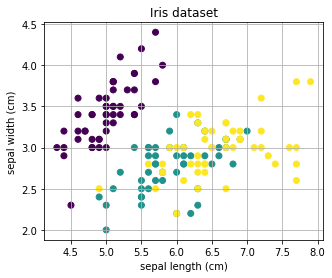

[37 37 38] [13 13 12]


In [4]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

plt.figure(figsize=(5,4))
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris dataset')
plt.grid()
plt.show()

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, stratify=y). # default train ratio is 0.25
print(np.bincount(ytrain), np.bincount(ytest))

Explained var: 
[92.46187232  5.30664831  1.71026098  0.52121839]
Total_var = 100.000


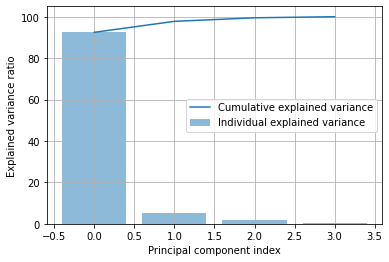

In [5]:
pca = PCA(n_components=4)
pca.fit(x)
print('Explained var: ')
exp_var =pca.explained_variance_ratio_*100 
print(exp_var)  # for each feature
total_var = pca.explained_variance_ratio_.sum() * 100
print('Total_var = %0.3f' % total_var)
cum_exp_var = np.cumsum(pca.explained_variance_ratio_ * 100)

plt.figure()
plt.plot(range(0,len(cum_exp_var)),cum_exp_var, label='Cumulative explained variance')
plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.show()

In [6]:
# create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
pca         = PCA()
percep      = Perceptron()
adaline     = SGDClassifier()
standScaler = StandardScaler()
minmax      = MinMaxScaler()
pipe1 = Pipeline(steps = [('minmax', minmax), ('standScaler', standScaler), ('pca', pca), ('percep', percep)])  # transform -> fit
pipe2 = Pipeline(steps = [('minmax', minmax), ('standScaler', standScaler), ('pca', pca), ('adaline', adaline)])


In [7]:
pipe1.steps[0]

('minmax', MinMaxScaler())

In [8]:
pipe1.set_params(percep__eta0=0.5)

Pipeline(steps=[('minmax', MinMaxScaler()), ('standScaler', StandardScaler()),
                ('pca', PCA()), ('percep', Perceptron(eta0=0.5))])

In [9]:
# grid search: exhaustive search over specified parameter values for an estimator
from sklearn.model_selection import GridSearchCV
param_grid  = dict(pca__n_components=[1, 2, 3, 4], percep__eta0=[0.2, 0.5, 0.8 , 1.0])
grid_search = GridSearchCV(pipe1, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10) 
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START pca__n_components=1, percep__eta0=0.2......................
[CV 1/5; 1/16] END pca__n_components=1, percep__eta0=0.2;, score=0.870 total time=   0.0s
[CV 2/5; 1/16] START pca__n_components=1, percep__eta0=0.2......................
[CV 2/5; 1/16] END pca__n_components=1, percep__eta0=0.2;, score=0.609 total time=   0.0s
[CV 3/5; 1/16] START pca__n_components=1, percep__eta0=0.2......................
[CV 3/5; 1/16] END pca__n_components=1, percep__eta0=0.2;, score=0.864 total time=   0.0s
[CV 4/5; 1/16] START pca__n_components=1, percep__eta0=0.2......................
[CV 4/5; 1/16] END pca__n_components=1, percep__eta0=0.2;, score=0.909 total time=   0.0s
[CV 5/5; 1/16] START pca__n_components=1, percep__eta0=0.2......................
[CV 5/5; 1/16] END pca__n_components=1, percep__eta0=0.2;, score=0.773 total time=   0.0s
[CV 1/5; 2/16] START pca__n_components=1, percep__eta0=0.5......................
[CV

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                       ('standScaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('percep', Perceptron(eta0=0.5))]),
             param_grid={'pca__n_components': [1, 2, 3, 4],
                         'percep__eta0': [0.2, 0.5, 0.8, 1.0]},
             scoring='accuracy', verbose=10)

In [10]:
# print best parameters: cross_validation score
print('Best parameters (CV score=%0.3f):' % grid_search.best_score_)
print(grid_search.best_params_)
ypred = grid_search.predict(xtest)
for a, b in zip(ytest, ypred):
  print(a, b)

Best parameters (CV score=0.910):
{'pca__n_components': 3, 'percep__eta0': 0.2}
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 2
2 2
2 2
2 2
1 1
2 2
1 1
0 0
0 0
2 2
0 0
1 2
2 2
1 0
1 2
0 0
2 2
0 0
0 0
1 1
2 2
1 2
0 0
1 2
2 2
2 2
0 0
1 2
2 2
2 2


In [ ]:
pipe1.set_params(pca__n_components = 3, percep__eta0=0.2)
pipe1.verbose = True
pipe1.fit(xtrain, ytrain)
print('training score: %0.3f' % pipe1.score(xtrain, ytrain))
print('testing score: %0.3f' % pipe1.score(xtest, ytest))

[Pipeline] ............ (step 1 of 4) Processing minmax, total=   0.0s
[Pipeline] ....... (step 2 of 4) Processing standScaler, total=   0.0s
[Pipeline] ............... (step 3 of 4) Processing pca, total=   0.0s
[Pipeline] ............ (step 4 of 4) Processing percep, total=   0.0s
training score: 0.839
testing score: 0.816


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred = pipe1.predict(xtest)
for a, b in zip(ytest, ypred):
    print(a, b)

print('Confusion matrix:')
print(confusion_matrix(ytest, ypred))

print('Precision score = %0.3f' % precision_score(ytest, ypred, average='weighted'))
print('Recall score = %0.3f' % recall_score(ytest, ypred, average='weighted'))


0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 2
2 2
2 2
2 2
1 1
2 2
1 1
0 0
0 0
2 2
0 0
1 2
2 2
1 0
1 2
0 0
2 2
0 0
0 0
1 1
2 2
1 2
0 0
1 2
2 2
2 2
0 0
1 2
2 2
2 2
Confusion matrix:
[[13  0  0]
 [ 1  6  6]
 [ 0  0 12]]
Precision score = 0.870
Recall score = 0.816


In [ ]:
# fit pipe2 to xtrain, ytrain
pipe2.steps
pipe2.set_params(adaline__eta0=0.5)
pipe2.fit(xtrain, ytrain)



print('training score: %0.3f' % pipe2.score(xtrain, ytrain))
print('testing score: %0.3f' % pipe2.score(xtest, ytest))

print('Confusion matrix:')
print(confusion_matrix(ytest, pipe2.predict(xtest)))

print('Precision score = %0.3f' % precision_score(ytest, pipe2.predict(xtest), average='weighted'))
print('Recall score = %0.3f' % recall_score(ytest, pipe2.predict(xtest)
, average='weighted'))

training score: 0.955
testing score: 1.000
Confusion matrix:
[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]
Precision score = 1.000
Recall score = 1.000


(100, 2)


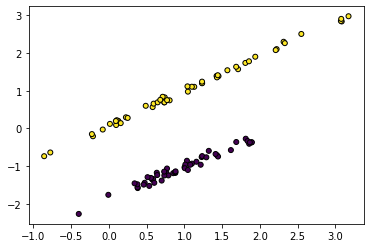

In [ ]:
# classification dataset:
x, y = datasets.make_classification(n_samples=100, n_features=2,  n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=42) # Random genererated classification dataset
x = np.asarray(x)
#print(x)
#print(y)
print(x.shape)

plt.figure
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, s=25, edgecolor='k')